# Module 6 - THE LAST ONE

## Challenge I (partie 1) :

Dans la première partie du premier challenge (issu du notebook 06_02), il est simplement question de tester quelques générateurs de nombres aléatoires de la bibliothèque de python et de vérifier s'ils donnent des résultats semblables à ceux présentés dans le notebook.
Nous allons tester 2 méthodes différentes : 1) la fonction 'random.uniform' et 2) ..... Pour chacune d'entre elles nous allons reproduire la distribution exponentielle selon la méthode d'inversement de la fonction cumulative, et la distribution gaussienne avec la méthode de réjection de Neumann.

Avant toute chose, implémentons les packages habituels nécessaires pour les 2 parties et recopions les exemples du notebook utilisant 'numpy.random.random_sample' comme générateur aléatoire. Nous pourrons ainsi comparer nos résultats obtenus avec les exemples.

In [124]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

#### Distribution exponentielle aléatoire :

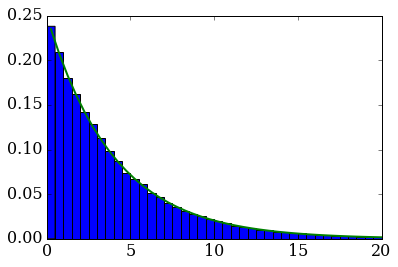

In [125]:
alpha = 0.25                                        # cfr notebook
n = 100000
x = numpy.random.random_sample(n)
y = -1/alpha*numpy.log(1-x)

binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(y,bins,normed=True);

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)


#### Distribution gaussienne aléatoire (méthode 1) :

Size of accepted set h and expected size 1/K: 71331 71428.57142857143


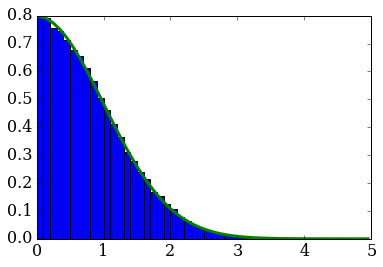

In [126]:
N = 100000                                        # cfr notebook
K = 1.4
h=[]

for i in range(N):
    u1 = numpy.random.random_sample()
    u2 = numpy.random.random_sample()
    
    g = numpy.log(1/(1-u1))
    
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
        
    if (u2<ratio):
        h.append(g)

print("Size of accepted set h and expected size 1/K:", len(h), N/K)

binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins=numpy.arange(0.,5., binwidth),normed=True,color='blue');

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')


### 1) Avec random.uniform

Cette fonction crée un nombre réel pseudo-aléatoire entre deux bornes précisées. Il nous faut d'abord l'importer :

In [127]:
import random
from random import uniform

#### Distribution exponentielle aléatoire :

La différence avec l'exemple est qu'on ne peut ici créer qu'un seul nombre à chaque fois. On va donc utiliser un tableau de n cases et y placer n nombres pseudo-aléatoires.

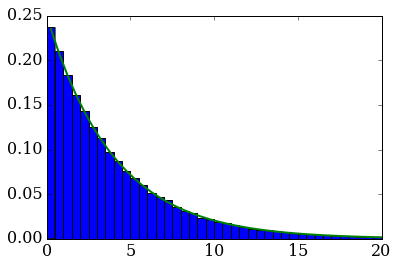

In [128]:
#alpha, n sont définis dans l'exemple

x = numpy.zeros(n)          # On crée un tableau à n cases

for i in range(n):          # On le remplit de n nombres pseudo-aléatoires
    t = random.uniform(0,1)
    x[i] = t
    
y = -1/alpha*numpy.log(1-x) # On calcule la fonction cumulative inverse en utilisant le tableau x

binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(y,bins,normed=True);

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)


Cela fonctionne bien.

#### Distribution gaussienne aléatoire : 

C'est encore plus simple ici puisqu'on n'a pas besoin de tout un tableau. On remarque en effet que 'numpy.random.random_sample()' est équivalente à 'random.uniform(0,1)' pour un seul argument.

Size of accepted set h and expected size 1/K: 71115 71428.57142857143


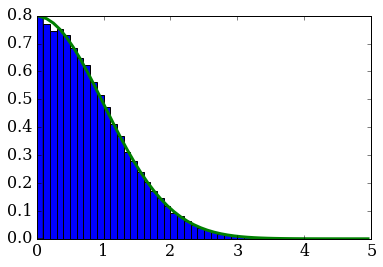

In [130]:
# N, K, sont définis dans l'exemple

h=[] # On doit recréer h par contre sinon il reste rempli avec les valeurs de l'exemple
     # On aurait pu simplement utiliser une autre lettre mais la comparaison est meilleure en gardant 
     # les mêmes lettres

for i in range(N):
    u1 = random.uniform(0,1)
    u2 = random.uniform(0,1)
    
    g = numpy.log(1/(1-u1))
    
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
        
    if (u2<ratio):
        h.append(g)

print("Size of accepted set h and expected size 1/K:", len(h), N/K)

binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins=numpy.arange(0.,5., binwidth),normed=True,color='blue');

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')

On obtient bien une gaussienne similaire, ainsi que des valeurs similaires de la longueur de h et de N/K.

## Comme je vois pas vraiment d'autres générateurs dans la documentation, je pense utiliser random.sample() qui prend et mélange n élements d'une liste de N > n nombres mais c'est pas un générateur donc je sais pas si c'est bon. Je demanderai à Max.

### 2) Avec random.sample :

# Challenge I (partie 2) :

On nous demande à présent d'implémenter l'algorithme de Box-Muller utilisé pour générer une distribution gaussienne. Cet algorithme permet de créer une courbe gaussienne à partir d'une distribution uniforme, que l'on sait générer facilement.

Sans entre dans les explications de la méthode, Box-Muller dit ceci : soient $a$ et $b$ deux variables aléatoires indépendantes et uniformément distribuées sur l'intervale ]0,1], alors $A$ et $B$ sont deux variables aléatoires indépendantes et suivant une loi gaussienne de d'écart-type $\sigma = 1$ si

$$A = \sqrt{-2ln(a)} cos(2\pi b)$$

$$B = \sqrt{-2ln(a)} sin(2\pi b)$$

Vérifions cela !

In [143]:
N = 1000000 # Suffisamment grand pour voir apparaître la gaussienne

a = numpy.random.random_sample(N) # On crée 2 tableaux de N éléments distribués uniformément entre 0 et 1
b = numpy.random.random_sample(N)

A = numpy.sqrt(-2*numpy.log(a))*numpy.cos(2*numpy.pi*b) # On applique Box-Muller
B = numpy.sqrt(-2*numpy.log(a))*numpy.sin(2*numpy.pi*b)

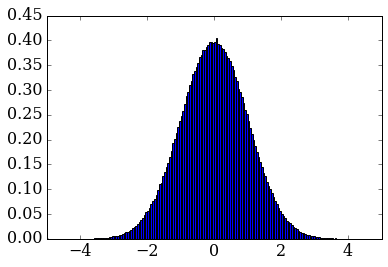

In [146]:
binwidth=.05
pyplot.xlim(-5,5)
pyplot.hist(A,bins=numpy.arange(-5,5, binwidth),normed=True);

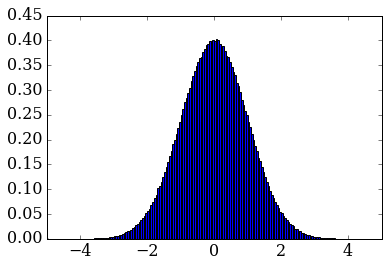

In [147]:
binwidth=.05
pyplot.xlim(-5,5)
pyplot.hist(B,bins=numpy.arange(-5,5, binwidth),normed=True);

On aurait pu se contenter d'une gaussienne mais on vient bien qu'on a réussi à créer des distributions gaussiennes à l'aide d'un algorithme extrêmement simple !

## Chalenge II :